In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys, os
sys.path.append(os.path.abspath("../.."))
from configs import GOOGLE_APPLICATION_CREDENTIALS,GCS_BUCKET_NAME,GCS_PROJECT_ID
from google.cloud import bigquery

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
client = bigquery.Client.from_service_account_json(GOOGLE_APPLICATION_CREDENTIALS)

query = """SELECT *
FROM `khangtestdbt.xecupredict.data_done` """
data = client.query(query).to_dataframe()
data.head(1)

,km,origin,body,fuel,brand,age,price
0,105.0,Trong Nước,Minivan,Xăng,Toyota,14.0,205000000.0


In [4]:
df = data.copy()

In [5]:
df.head(10)

,km,origin,body,fuel,brand,age,price
0,105.0,Trong Nước,Minivan,Xăng,Toyota,14.0,205000000.0
1,107.0,Trong Nước,Minivan,Xăng,Toyota,15.0,235000000.0
2,110.0,Nhập Khẩu,Hatchback,Xăng,Hyundai,11.0,232000000.0
3,110.0,Nhập Khẩu,Sedan,Xăng,Toyota,18.0,295000000.0
4,112.0,Nhập Khẩu,Mui Trần,Xăng,Mini,20.0,365000000.0
5,112.0,Trong Nước,Suv,Xăng,Toyota,22.0,155000000.0
6,113.0,Trong Nước,Hatchback,Xăng,Ford,11.0,275000000.0
7,113.0,Trong Nước,Sedan,Xăng,Kia,15.0,245000000.0
8,115.0,Trong Nước,Suv,Dầu,Ford,17.0,220000000.0
9,120.0,Nhập Khẩu,Sedan,Xăng,Honda,18.0,295000000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   km      11305 non-null  float64
 1   origin  11305 non-null  object 
 2   body    11305 non-null  object 
 3   fuel    11305 non-null  object 
 4   brand   11305 non-null  object 
 5   age     11305 non-null  float64
 6   price   11305 non-null  float64
dtypes: float64(3), object(4)
memory usage: 618.4+ KB


In [7]:
df.describe(include="all")

,km,origin,body,fuel,brand,age,price
count,11305.000000,11305,11305,11305,11305,11305.000000,1.130500e+04
unique,NaN,2,14,4,26,NaN,NaN
top,NaN,Nhập Khẩu,Suv,Xăng,Toyota,NaN,NaN
freq,NaN,6238,5291,9049,2038,NaN,NaN
mean,69247.223176,NaN,NaN,NaN,NaN,6.963025,8.335636e+08
std,50244.207545,NaN,NaN,NaN,NaN,5.441858,1.097431e+09
min,105.000000,NaN,NaN,NaN,NaN,0.000000,5.100000e+07
25%,30000.000000,NaN,NaN,NaN,NaN,3.000000,3.467500e+08
50%,62000.000000,NaN,NaN,NaN,NaN,6.000000,5.350000e+08
75%,95000.000000,NaN,NaN,NaN,NaN,10.000000,8.600000e+08


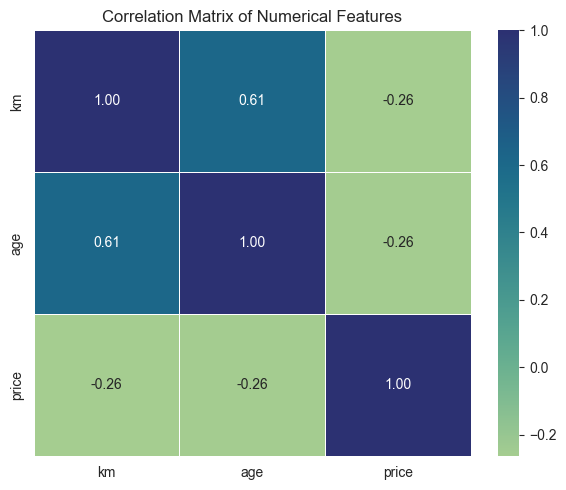

In [8]:
num_cols = ["km", "age", "price"]

corr = df[num_cols].corr()

plt.figure(figsize=(6,5))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="crest",
    linewidths=0.5
)

plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


In [9]:
def plot_categorical_distribution(client, table, column, figsize=(8,5), palette="Set2"):

    query = f"""
    SELECT {column}
    FROM `{table}`
    WHERE {column} IS NOT NULL
    """
    df = client.query(query).to_dataframe()

    plt.figure(figsize=figsize)
    sns.countplot(y=column, data=df, palette=palette, order=df[column].value_counts().index)
    plt.title(f"{column} Distribution")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()


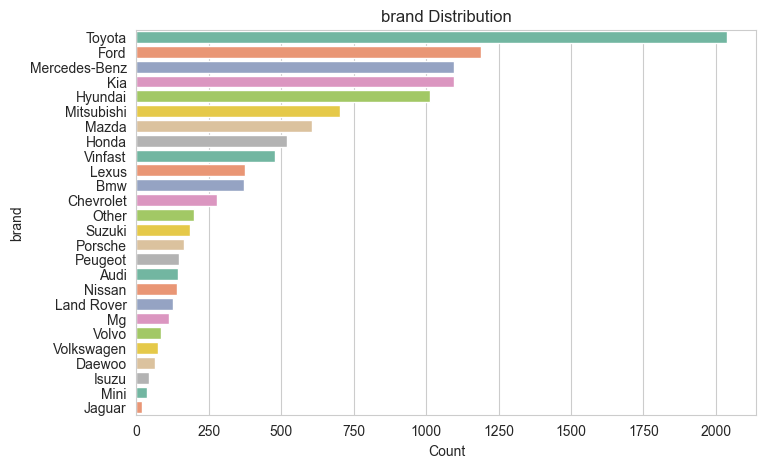

In [10]:
plot_categorical_distribution(client, "khangtestdbt.xecupredict.data_done", "brand")

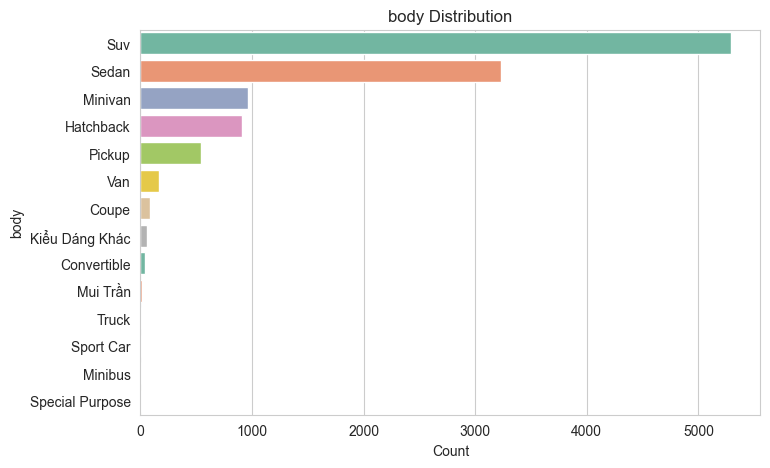

In [11]:
plot_categorical_distribution(client, "khangtestdbt.xecupredict.data_done", "body")

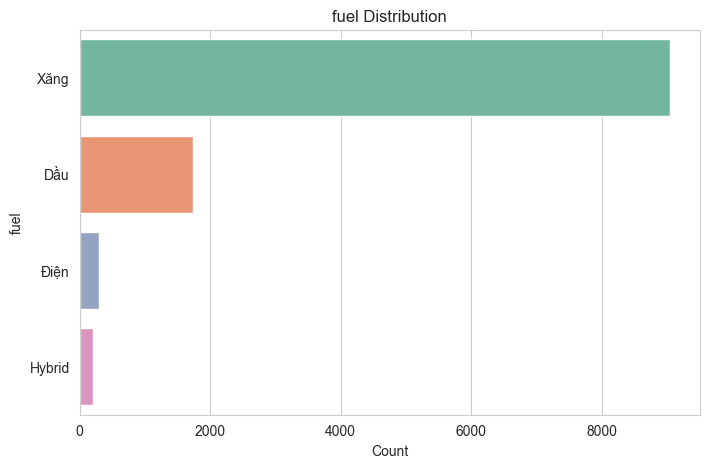

In [12]:
plot_categorical_distribution(client, "khangtestdbt.xecupredict.data_done", "fuel")

In [13]:
def plot_numeric_distribution(client, table, column, figsize=(8,5), color="green"):

    query = f"""
    SELECT {column}
    FROM `{table}`
    WHERE {column} IS NOT NULL
    """
    df = client.query(query).to_dataframe()
    
    plt.figure(figsize=figsize)
    sns.histplot(x=column, data=df, color=color, kde=False)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


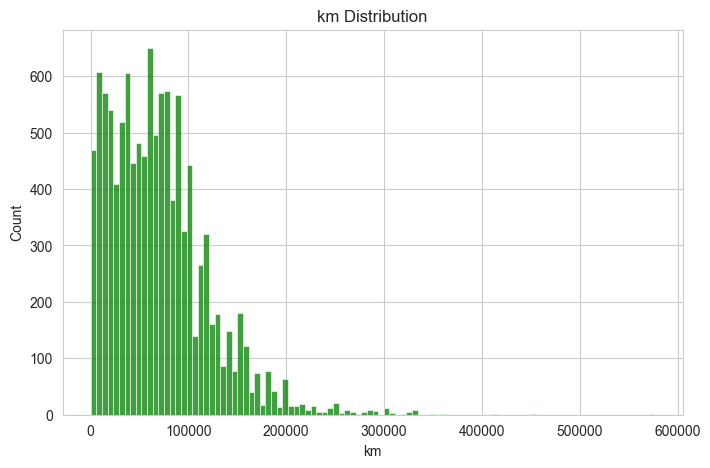

In [14]:
plot_numeric_distribution(client, "khangtestdbt.xecupredict.data_done", "km", color="green")

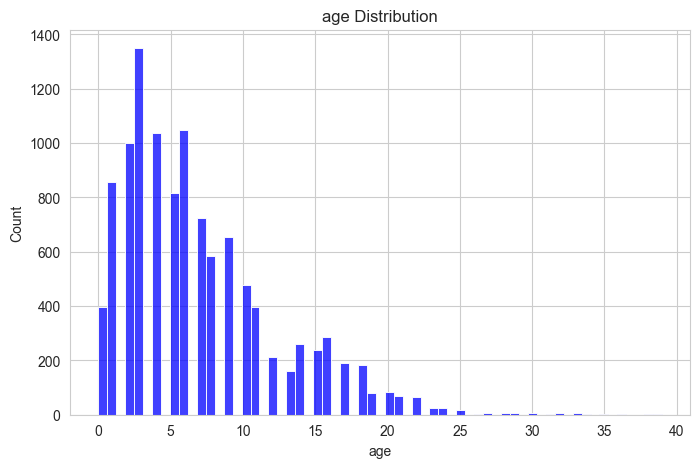

In [15]:
plot_numeric_distribution(client, "khangtestdbt.xecupredict.data_done", "age", color="blue")

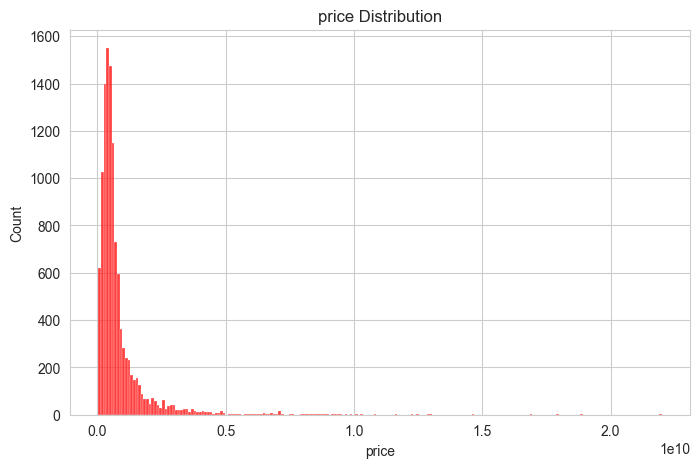

In [16]:
plot_numeric_distribution(client, "khangtestdbt.xecupredict.data_done", "price", color="red")

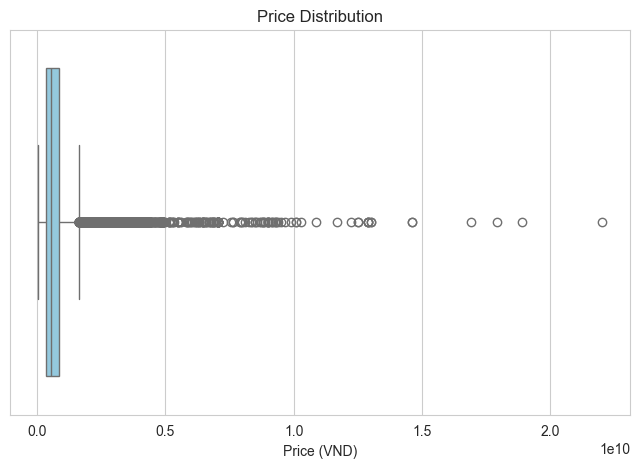

In [17]:
query = """
SELECT
  price
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
"""

df_price = client.query(query).to_dataframe()

plt.figure(figsize=(8, 5))
sns.boxplot(x="price", data=df_price, color="skyblue")
plt.title("Price Distribution")
plt.xlabel("Price (VND)")
plt.show()


In [18]:
query = """
SELECT
  origin,
  price
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
  AND origin IS NOT NULL
"""

df_origin_price = client.query(query).to_dataframe()
df_origin_price.head()

,origin,price
0,Trong Nước,205000000.0
1,Trong Nước,235000000.0
2,Nhập Khẩu,232000000.0
3,Nhập Khẩu,295000000.0
4,Nhập Khẩu,365000000.0


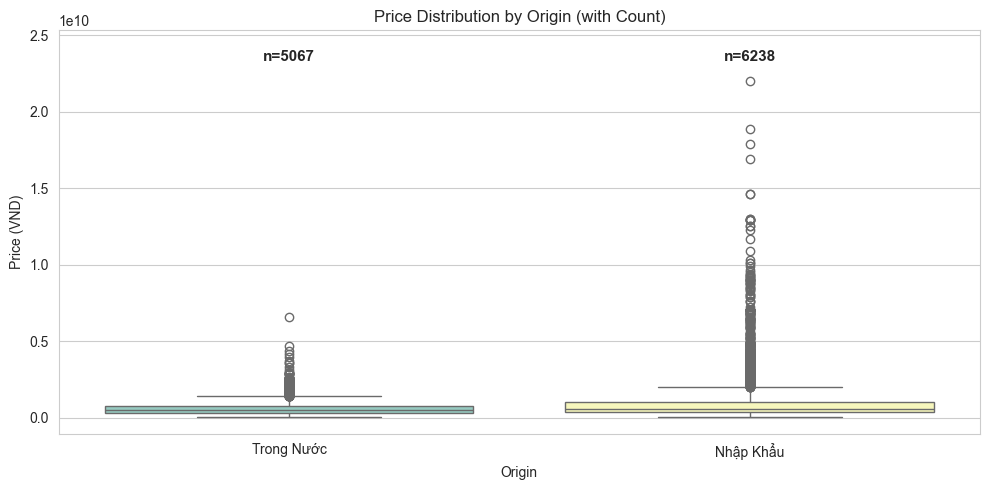

In [19]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(
    x="origin",
    y="price",
    data=df_origin_price,
    palette="Set3"
)

plt.title("Price Distribution by Origin (with Count)")
plt.ylabel("Price (VND)")
plt.xlabel("Origin")

counts = df_origin_price["origin"].value_counts()
y_max = df_origin_price["price"].max()

for i, origin in enumerate(ax.get_xticklabels()):
    origin_name = origin.get_text()
    count = counts[origin_name]

    ax.text(
        i,
        y_max * 1.05,
        f"n={count}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

plt.ylim(top=y_max * 1.15)
plt.tight_layout()
plt.show()


## 🔍 Insight: Ảnh hưởng của Nguồn gốc xe đến Giá Xe Cũ

### 📊 Quan sát từ dữ liệu

* Số lượng xe **nhập khẩu** xuất hiện nhiều hơn so với xe **trong nước** trong tập dữ liệu.
* **Median giá của hai nhóm gần tương đương**, cho thấy *nguồn gốc không chi phối mạnh phân khúc phổ thông*.
* Xe **nhập khẩu có dải giá rộng hơn**, phản ánh sự đa dạng về phân khúc (từ trung cấp đến cao cấp).
* **Q3 và mức giá tối đa của xe nhập khẩu cao hơn rõ rệt**, trong khi xe **trong nước tập trung hơn và ít outlier giá cao**.

---

### 🧠 Insight chính

* **Nguồn gốc không quyết định giá trung bình**, nhưng **tác động rõ rệt ở phân khúc giá cao**.
* **Phân khúc xe cũ cao cấp chủ yếu là xe nhập khẩu**, thể hiện qua Q3 và các outlier giá cao.
* Ở **phân khúc phổ thông**, các yếu tố như **tuổi xe, số km, thương hiệu và kiểu dáng** có ảnh hưởng lớn hơn origin.

---

## 🚗 Lời khuyên dành cho Người Mua Xe

### 💸 Ngân sách phổ thông – trung bình

* **Không nên ưu tiên nguồn gốc** khi ra quyết định.

* Nên tập trung vào:

  * Tuổi xe
  * Mức sử dụng
  * Thương hiệu & kiểu dáng

* Xe **trong nước** thường:

  * Dễ bảo dưỡng
  * Chi phí sửa chữa thấp hơn
  * Giá trị sử dụng / chi phí tốt hơn

---

### 💎 Nhắm tới phân khúc cao cấp

* **Xe nhập khẩu mang lại nhiều lựa chọn hơn**, đặc biệt với các dòng cao cấp.

* Cần:

  * So sánh kỹ giá giữa các xe cùng phân khúc
  * Tránh trả giá cao **chỉ vì nhãn “nhập khẩu”**

* Nên kiểm tra kỹ:

  * Lịch sử sử dụng
  * Tình trạng kỹ thuật
  * Chi phí bảo dưỡng dài hạn

---

## 🚘 Lời khuyên dành cho Người Bán Xe

### 📈 Bán xe nhập khẩu

* **Lợi thế cạnh tranh rõ ràng ở phân khúc cao cấp**.

* Có thể:

  * Định giá cao hơn nếu xe thuộc phân khúc tốt
  * Nhấn mạnh yếu tố **nguồn gốc nhập khẩu** trong mô tả

* ⚠️ Tránh:

  * Định giá quá cao nếu xe thuộc phân khúc phổ thông → **dễ khó bán**

---

### 📉 Bán xe trong nước

* **Không nên tự hạ giá** chỉ vì không phải xe nhập khẩu.

* Nên tập trung truyền thông vào:

  * Chi phí sử dụng thấp
  * Dễ sửa chữa, phụ tùng sẵn
  * Phù hợp người mua lần đầu

* Ở phân khúc phổ thông:

  * **Nguồn gốc không phải yếu tố bất lợi**


In [20]:
query = """
SELECT
price,
origin,
  CASE
    WHEN age <= 5 THEN '<=5'
    WHEN age BETWEEN 6 AND 10 THEN '6-10'
    WHEN age BETWEEN 11 AND 15 THEN '11-15'
    WHEN age BETWEEN 16 AND 20 THEN '16-20'
    ELSE '>20'
  END AS age_group
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
  AND age IS NOT NULL
  AND origin IS NOT NULL
"""

df_age_origin_price = client.query(query).to_dataframe()
df_age_origin_price.head()


,price,origin,age_group
0,205000000.0,Trong Nước,11-15
1,235000000.0,Trong Nước,11-15
2,232000000.0,Nhập Khẩu,11-15
3,295000000.0,Nhập Khẩu,16-20
4,365000000.0,Nhập Khẩu,16-20


In [21]:
age_order = ["<=5", "6-10", "11-15", "16-20", ">20"]

df_age_origin_price["age_group"] = pd.Categorical(
    df_age_origin_price["age_group"],
    categories=age_order,
    ordered=True
)


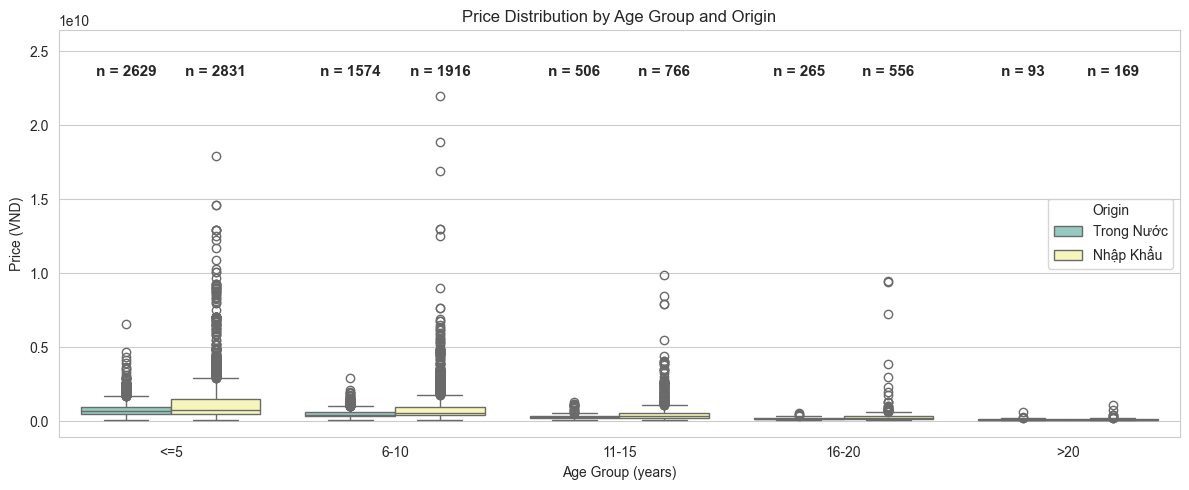

In [22]:
plt.figure(figsize=(12,5))

ax = sns.boxplot(
    x="age_group",
    y="price",
    hue="origin",
    data=df_age_origin_price,
    palette="Set3"
)

plt.title("Price Distribution by Age Group and Origin")
plt.xlabel("Age Group (years)")
plt.ylabel("Price (VND)")
plt.legend(title="Origin")

counts = df_age_origin_price.groupby(["age_group", "origin"]).size()
y_max = df_age_origin_price["price"].max()

age_categories = df_age_origin_price["age_group"].cat.categories
origin_categories = df_age_origin_price["origin"].unique()

for i, age in enumerate(age_categories):
    for j, origin in enumerate(origin_categories):
        if (age, origin) in counts.index:
            ax.text(
                i + (-0.2 if j == 0 else 0.2),
                y_max * 1.05,
                f"n = {counts[(age, origin)]}",
                ha="center",
                va="bottom",
                fontsize=11,
                fontweight="bold"
            )
plt.ylim(top=y_max * 1.2)
plt.tight_layout()
plt.show()

## 🔍 Insight: Giá Xe theo Tuổi Xe và Nguồn Gốc

### 📊 Quan sát từ dữ liệu

* **Nhóm xe cao tuổi (>16 năm)**:
  Giá xe **trong nước và nhập khẩu gần tương đương**, số lượng xe được bán **khá ít**, tuy nhiên **xe nhập khẩu chiếm tỷ trọng cao hơn**.

* **Nhóm xe 11–15 năm**:
  Số lượng xe **nhập khẩu được bán nhiều hơn**, đồng thời **mức giá nhỉnh hơn** so với xe trong nước.

* **Nhóm xe 6–10 năm**:
  Số lượng xe bán ra **tương đương giữa hai nhóm**, tuy nhiên **giá xe nhập khẩu cao hơn rõ rệt**.
  Phân khúc **xe sang trong nhóm tuổi này chủ yếu là xe nhập khẩu**.

* **Nhóm xe mới (≤5 năm)**:
  Số lượng xe bán ra **tương đương**, nhưng **phân khúc hạng sang gần như hoàn toàn thuộc về xe nhập khẩu**.

---

## 🚗 Lời khuyên dành cho Người Mua Xe (theo Tuổi Xe & Nguồn Gốc)

### 🔹 Xe cao tuổi (>16 năm)

* Giá xe **trong nước và nhập khẩu gần tương đương**.
* **Xe trong nước** là lựa chọn hợp lý hơn do:

  * Chi phí bảo dưỡng thấp
  * Dễ tìm phụ tùng
* ❌ **Không nên trả thêm tiền chỉ vì xe nhập khẩu**.

---

### 🔹 Xe 11–15 năm

* Xe **nhập khẩu có giá nhỉnh hơn**, số lượng nhiều hơn.
* Chỉ nên chọn xe nhập khẩu nếu:

  * Tình trạng xe tốt
  * Lịch sử bảo dưỡng rõ ràng
* Nếu ưu tiên **kinh tế & sử dụng lâu dài**, xe trong nước vẫn là lựa chọn an toàn.

---

### 🔹 Xe 6–10 năm

* **Phân khúc xe sang chủ yếu là xe nhập khẩu**.
* Xe nhập khẩu phù hợp nếu:

  * Người mua quan tâm đến thương hiệu, trải nghiệm lái
* Xe trong nước phù hợp nếu:

  * Mục tiêu là **chi phí – hiệu năng**

---

### 🔹 Xe mới (≤5 năm)

* **Xe nhập khẩu chiếm ưu thế rõ rệt ở phân khúc cao cấp**.
* Người mua có ngân sách cao:

  * Nên cân nhắc xe nhập khẩu
* Người mua thực dụng:

  * Xe trong nước vẫn đáp ứng tốt nhu cầu đi lại hàng ngày

---

## 🚘 Lời khuyên dành cho Người Bán Xe (theo Tuổi Xe & Nguồn Gốc)

### 📈 Bán xe nhập khẩu

* **Xe mới (≤5 năm) & 6–10 năm**:

  * Có thể **định giá cao hơn mặt bằng chung** nếu xe thuộc phân khúc sang
  * Nên nhấn mạnh:

    * Thương hiệu
    * Nguồn gốc nhập khẩu
    * Option, trải nghiệm lái

* **Xe 11–15 năm**:

  * Chỉ nên định giá cao hơn nếu:

    * Xe còn tình trạng tốt
    * Bảo dưỡng đầy đủ
  * Tránh định giá quá cao → **dễ tồn kho lâu**

* **Xe >16 năm**:

  * Origin **không còn là lợi thế rõ ràng**
  * Nên cạnh tranh bằng:

    * Giá hợp lý
    * Tình trạng xe

---

### 📉 Bán xe trong nước

* **Xe >16 năm & 11–15 năm**:

  * Có lợi thế về:

    * Chi phí sử dụng
    * Độ phổ biến phụ tùng
  * Nên nhấn mạnh yếu tố **kinh tế & dễ sử dụng**

* **Xe 6–10 năm & ≤5 năm**:

  * Cần cạnh tranh bằng:

    * Giá bán
    * Tình trạng xe
    * Độ phù hợp với người mua thực dụng

* ❌ **Không nên tự hạ giá chỉ vì xe trong nước** nếu xe còn tốt.

In [23]:
query = """
WITH top5_brands AS (
  SELECT
    brand
  FROM `khangtestdbt.xecupredict.data_done`
  WHERE brand IS NOT NULL
  GROUP BY brand
  ORDER BY COUNT(*) DESC
  LIMIT 5
)

SELECT
  LOWER(d.brand) AS brand,
  d.origin,
  d.price
FROM `khangtestdbt.xecupredict.data_done` d
JOIN top5_brands t
  ON d.brand = t.brand
WHERE d.price IS NOT NULL
  AND d.origin IS NOT NULL
"""

df_top5 = client.query(query).to_dataframe()
df_top5.head()


,brand,origin,price
0,toyota,Trong Nước,205000000.0
1,toyota,Trong Nước,235000000.0
2,hyundai,Nhập Khẩu,232000000.0
3,toyota,Nhập Khẩu,295000000.0
4,toyota,Trong Nước,155000000.0


In [24]:
brand_order = (
    df_top5["brand"]
    .value_counts()
    .index
)

df_top5["brand"] = pd.Categorical(
    df_top5["brand"],
    categories=brand_order,
    ordered=True
)

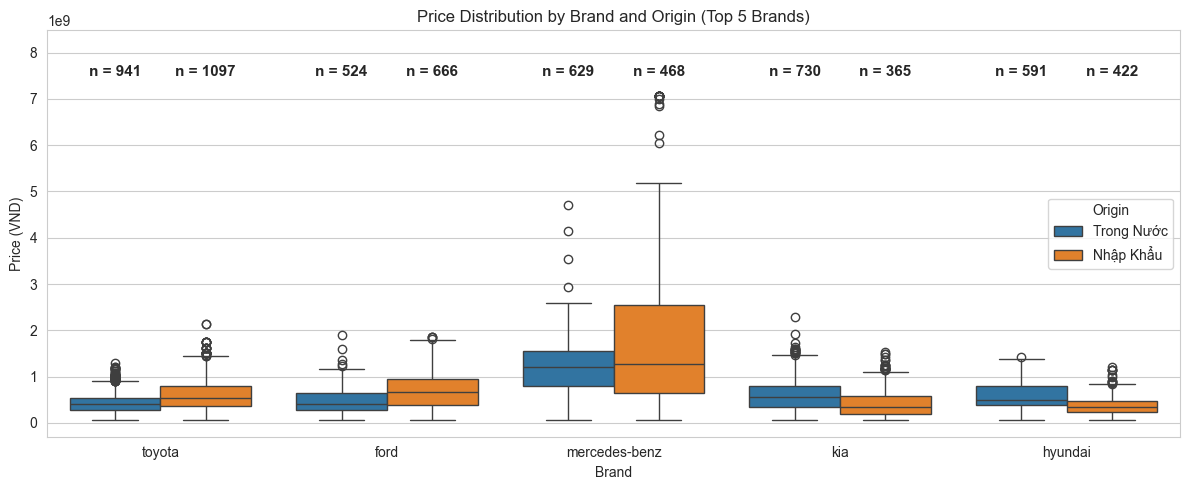

In [25]:
plt.figure(figsize=(12, 5))

ax = sns.boxplot(
    x="brand",
    y="price",
    hue="origin",
    data=df_top5
)

plt.title("Price Distribution by Brand and Origin (Top 5 Brands)")
plt.xlabel("Brand")
plt.ylabel("Price (VND)")
plt.legend(title="Origin")
counts = df_top5.groupby(["brand", "origin"]).size()
y_max = df_top5["price"].max()

brands = df_top5["brand"].cat.categories
origins = df_top5["origin"].unique()

for i, brand in enumerate(brands):
    for j, origin in enumerate(origins):
        if (brand, origin) in counts.index:
            ax.text(
                i + (-0.2 if j == 0 else 0.2),
                y_max * 1.05,
                f"n = {counts[(brand, origin)]}",
                ha="center",
                va="bottom",
                fontsize=11,
                fontweight="bold"
            )
plt.ylim(top=y_max * 1.2)
plt.tight_layout()
plt.show()


## 🔍 Insight: Giá xe theo **Nguồn gốc** ở Top 5 Hãng Bán Chạy Nhất

### 📊 Tổng quan Top 5 hãng

Top 5 hãng xe được bán nhiều nhất trong dữ liệu gồm:  
**Top 1 Toyota, Top 2 Ford, Top 3 Mercedes-Benz, Top 4 Kia và Top 5 Hyundai.**

Mỗi hãng thể hiện **mối quan hệ khác nhau giữa nguồn gốc (trong nước / nhập khẩu) và giá bán**, cho thấy **nguồn gốc không tác động đồng nhất giữa các hãng xe**.

---

### 🏆 Top 1 – Toyota

- Xe **trong nước được bán nhiều hơn** xe nhập khẩu.  
- **Giá xe nhập khẩu thấp hơn** xe trong nước.  
- Giá bán tập trung chủ yếu ở **phân khúc trung**, độ phân tán không quá lớn.

**Insight:**  
Với Toyota, **nguồn gốc không phải yếu tố quyết định giá bán**. Giá xe chịu ảnh hưởng nhiều hơn bởi **tuổi xe, mức độ sử dụng và độ phổ biến của các dòng xe**.

---

### 🥈 Top 2 – Ford

- **Số lượng xe nhập khẩu nhiều hơn** xe trong nước.  
- **Giá xe nhập khẩu cao hơn rõ rệt**.  
- Các mức giá cao chủ yếu đến từ **nhóm xe nhập khẩu**.

**Insight:**  
Đối với Ford, **nguồn gốc nhập khẩu gắn liền với phân khúc giá cao**, đặc biệt ở các dòng **SUV và xe thiên về trải nghiệm**, khiến nguồn gốc trở thành yếu tố quan trọng trong định giá.

---

### 🥉 Top 3 – Mercedes-Benz

- **Xe trong nước được bán nhiều hơn** về số lượng.  
- **Giá trung vị của hai nhóm gần tương đương**.  
- Tuy nhiên, **phân khúc giá cao (Q3 và giá tối đa) gần như thuộc về xe nhập khẩu**.

**Insight:**  
Với Mercedes-Benz, **nguồn gốc không ảnh hưởng mạnh đến giá trung bình**, nhưng **quyết định rõ rệt ở phân khúc cao cấp**.

---

### 🚙 Top 4 – Kia

- **Xe trong nước được bán nhiều gấp khoảng hai lần** xe nhập khẩu.  
- **Giá xe trong nước cao hơn** xe nhập khẩu.  
- Phản ánh sự **tin tưởng của thị trường** đối với xe Kia lắp ráp trong nước.

**Insight:**  
Kia là trường hợp điển hình cho thấy **xe trong nước vừa có tính thanh khoản tốt hơn, vừa có giá cao hơn**, trong khi xe nhập khẩu **không tạo lợi thế cạnh tranh**.

---

### 🚗 Top 5 – Hyundai

- **Xe trong nước chiếm ưu thế về số lượng**.  
- **Giá xe trong nước cao hơn** xe nhập khẩu.  
- Phù hợp với đặc điểm của **thị trường phổ thông – trung cấp**.

**Insight:**  
Với Hyundai, **xe trong nước có giá trị thị trường tốt hơn**, trong khi xe nhập khẩu **không tạo ra mức giá cao hơn như kỳ vọng**.

---

## 🧠 Insight tổng hợp

- **Nguồn gốc ảnh hưởng khác nhau tùy theo hãng**, không thể áp dụng một quy luật chung.
- Với các hãng **phổ thông** (*Toyota, Kia, Hyundai*):
  - Nguồn gốc **ít khi là yếu tố quyết định giá bán**.
- Với các hãng **thiên về SUV hoặc cao cấp** (*Ford, Mercedes-Benz*):
  - Nguồn gốc **tác động mạnh ở phân khúc giá cao**.

---

## 🚗 Lời khuyên dành cho Người Mua Xe

### 💸 Phân khúc phổ thông
- ❌ **Không nên trả thêm tiền chỉ vì xe nhập khẩu**.  
- Nên ưu tiên:
  - Tuổi xe
  - Mức độ sử dụng (km)
  - Tình trạng thực tế của xe
- Với **Toyota, Kia, Hyundai**:
  - Xe trong nước thường mang lại **hiệu quả chi phí tốt hơn**.

### 💎 Phân khúc cao cấp
- Với **Ford và Mercedes-Benz**:
  - Xe nhập khẩu thường gắn với **phân khúc giá cao hơn**.
- Chỉ nên chọn xe nhập khẩu khi:
  - Xe còn tình trạng tốt
  - Giá bán phù hợp so với các xe cùng phân khúc
- ❌ Tránh mua xe nhập khẩu **chỉ vì yếu tố thương hiệu hoặc nguồn gốc**.

---

## 🚘 Lời khuyên dành cho Người Bán Xe

### 📈 Bán xe nhập khẩu
- Với **Ford và Mercedes-Benz**:
  - Có thể **định giá cao hơn** nếu xe thuộc phân khúc tốt.
  - Nên nhấn mạnh:
    - Nguồn gốc nhập khẩu
    - Trang bị, option
    - Trải nghiệm vận hành
- Với **Toyota, Hyundai và Kia**:
  - Nguồn gốc **không phải lợi thế lớn**, tránh định giá quá cao.

### 📉 Bán xe trong nước
- Với **Toyota, Kia và Hyundai**:
  - **Không nên tự hạ giá** chỉ vì xe trong nước.
  - Nên tập trung truyền thông vào:
    - Độ bền, độ ổn định
    - Chi phí sử dụng thấp
    - Phù hợp với nhu cầu số đông
- Với **Mercedes-Benz**:
  - Nên định giá **sát mức giá trung vị của thị trường**, cạnh tranh bằng **tình trạng và lịch sử sử dụng của xe**.


In [26]:
query = """
SELECT
  fuel,
  price
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
  AND fuel IS NOT NULL

"""

df_fuel = client.query(query).to_dataframe()
df_fuel.head()


,fuel,price
0,Xăng,205000000.0
1,Xăng,235000000.0
2,Xăng,232000000.0
3,Xăng,295000000.0
4,Xăng,365000000.0


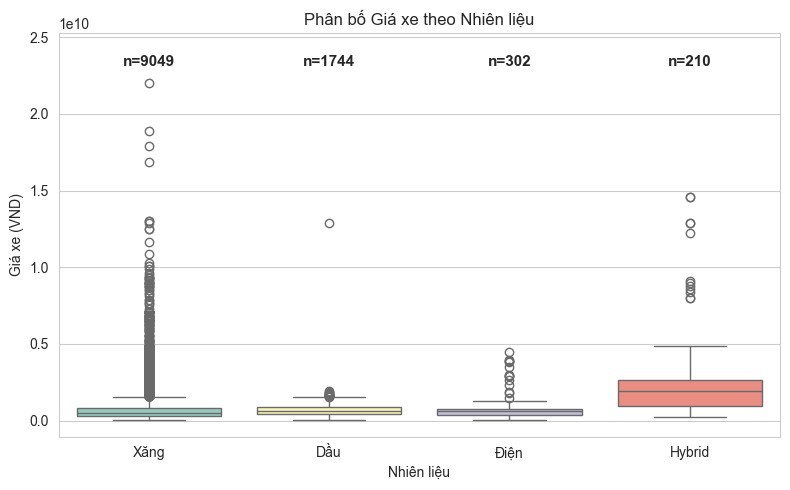

In [27]:
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    x="fuel",
    y="price",
    data=df_fuel,
    palette="Set3"
)

plt.title("Phân bố Giá xe theo Nhiên liệu")
plt.xlabel("Nhiên liệu")
plt.ylabel("Giá xe (VND)")

counts = df_fuel["fuel"].value_counts()
y_max = df_fuel["price"].max()

for i, fuel in enumerate(ax.get_xticklabels()):
    fuel_name = fuel.get_text()
    ax.text(
        i,
        y_max * 1.05,
        f"n={counts[fuel_name]}",
        ha="center",
        fontsize=11,
        fontweight="bold"
    )

plt.ylim(top=y_max * 1.15)
plt.tight_layout()
plt.show()


## 🔍 Insight: Giá Xe theo **Nhiên liệu**

### 📊 Quan sát từ dữ liệu

- **Giá trung vị (median)**:
  - **Xe xăng có median thấp nhất**, phản ánh vai trò chủ đạo ở phân khúc phổ thông.
  - **Xe dầu và xe điện có median gần tương đương nhau**, thường nằm ở phân khúc trung.
  - **Xe hybrid có median cao nhất**, cho thấy xu hướng thuộc nhóm xe giá trị cao hơn.

- **Cơ cấu số lượng trên thị trường**:
  - **Xe xăng chiếm tỷ trọng lớn nhất**, áp đảo các loại nhiên liệu khác.
  - **Xe dầu đứng thứ hai**, phổ biến ở các dòng SUV và xe gia đình.
  - **Xe điện và hybrid chiếm tỷ lệ khá thấp**, trong đó hybrid là ít nhất.

- **Phân khúc giá theo nhiên liệu**:
  - **Xe xăng trải dài nhiều phân khúc**, nhưng tập trung chủ yếu ở **hạng thấp và trung**.
  - **Xe dầu và xe điện** có mức giá tương đồng, chủ yếu thuộc **phân khúc trung**.
  - **Xe hybrid** tập trung nhiều ở **phân khúc trung – cận cao**.
  - **Phân khúc hạng sang** vẫn **chủ yếu là xe xăng**, do nguồn cung lớn và đa dạng mẫu mã.

---

## 🧠 Insight chính

- **Nhiên liệu có ảnh hưởng đến giá**, nhưng **không phải yếu tố quyết định duy nhất**.
- **Xe xăng đóng vai trò trụ cột của thị trường**, quyết định mặt bằng giá chung.
- **Hybrid là phân khúc nhỏ nhưng giá trị cao**, phản ánh xu hướng công nghệ và tiết kiệm nhiên liệu.
- **Xe điện chưa chiếm ưu thế về giá hay số lượng**, cho thấy thị trường xe cũ điện còn ở giai đoạn sớm.

---

## 🚗 Lời khuyên dành cho Người Mua Xe

### 💸 Ngân sách phổ thông
- **Xe xăng là lựa chọn tối ưu**:
  - Nhiều lựa chọn
  - Dễ so sánh giá
  - Chi phí bảo dưỡng hợp lý
- Không nên trả giá cao chỉ vì:
  - Xe dầu hoặc xe điện nếu mục tiêu chính là **tiết kiệm chi phí mua ban đầu**.

### 💎 Ngân sách trung – cao
- **Xe dầu**:
  - Phù hợp với người đi nhiều, cần sức kéo và độ bền.
- **Xe hybrid**:
  - Phù hợp người mua quan tâm đến:
    - Công nghệ
    - Tiết kiệm nhiên liệu
    - Giá trị sử dụng lâu dài
- **Xe điện**:
  - Chỉ nên chọn khi:
    - Có hạ tầng sạc phù hợp
    - Hiểu rõ chi phí sử dụng dài hạn

### ❗ Khuyến nghị chung
- Không nên đánh giá giá trị xe **chỉ dựa trên nhiên liệu**.
- Cần xem xét kết hợp:
  - Tuổi xe
  - Số km đã sử dụng
  - Thương hiệu và kiểu dáng

---

## 🚘 Lời khuyên dành cho Người Bán Xe

### 📈 Bán xe xăng
- Cạnh tranh cao → **định giá sát thị trường**.
- Nên nhấn mạnh:
  - Tình trạng xe
  - Lịch sử bảo dưỡng
  - Chi phí sử dụng thấp

### 📈 Bán xe dầu
- Có thể định giá tốt hơn xe xăng nếu:
  - Xe thuộc dòng SUV / xe gia đình
  - Mức tiêu hao nhiên liệu hợp lý
- Nên truyền thông vào:
  - Độ bền
  - Khả năng đi đường dài

### 💎 Bán xe hybrid
- Dù số lượng ít, **giá trị cao**:
  - Có thể định giá nhỉnh hơn phân khúc trung
- Nên làm nổi bật:
  - Công nghệ
  - Khả năng tiết kiệm nhiên liệu
  - Xu hướng xanh

### ⚠️ Bán xe điện
- Tránh định giá quá cao do:
  - Nguồn cầu còn hạn chế
- Nên minh bạch:
  - Tình trạng pin
  - Chi phí vận hành
  - Khả năng sạc


In [28]:
query = """
SELECT
  fuel,
  origin,
  price
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
  AND fuel IS NOT NULL
  AND origin IS NOT NULL


"""

df_fuel_origin = client.query(query).to_dataframe()
df_fuel_origin.head()


,fuel,origin,price
0,Xăng,Trong Nước,205000000.0
1,Xăng,Trong Nước,235000000.0
2,Xăng,Nhập Khẩu,232000000.0
3,Xăng,Nhập Khẩu,295000000.0
4,Xăng,Nhập Khẩu,365000000.0


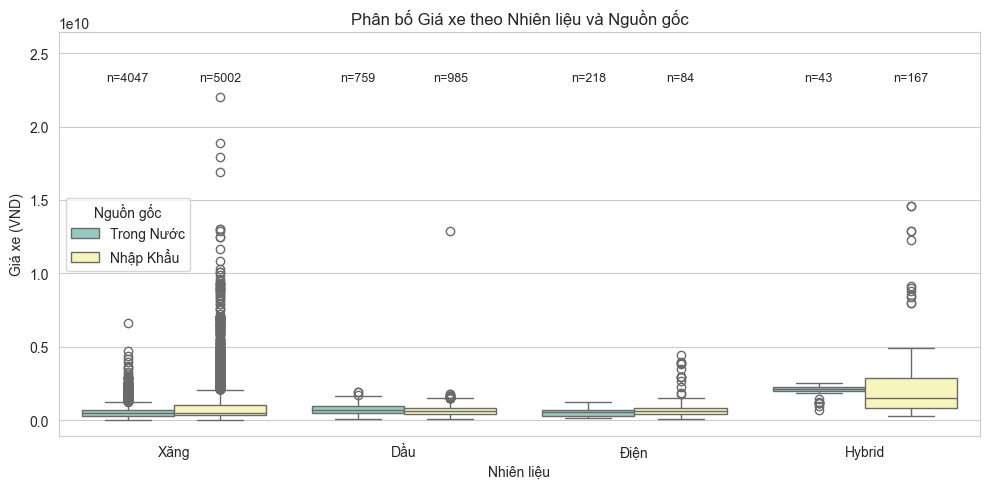

In [29]:
plt.figure(figsize=(10, 5))

ax = sns.boxplot(
    x="fuel",
    y="price",
    hue="origin",
    data=df_fuel_origin,
    palette="Set3"
)

plt.title("Phân bố Giá xe theo Nhiên liệu và Nguồn gốc")
plt.xlabel("Nhiên liệu")
plt.ylabel("Giá xe (VND)")
plt.legend(title="Nguồn gốc")

counts = df_fuel_origin.groupby(["fuel", "origin"]).size()
y_max = df_fuel_origin["price"].max()

fuels = df_fuel_origin["fuel"].unique()
origins = df_fuel_origin["origin"].unique()

for i, fuel in enumerate(fuels):
    for j, origin in enumerate(origins):
        if (fuel, origin) in counts:
            ax.text(
                i + (-0.2 if j == 0 else 0.2),
                y_max * 1.05,
                f"n={counts[(fuel, origin)]}",
                ha="center",
                fontsize=9
            )

plt.ylim(top=y_max * 1.2)
plt.tight_layout()
plt.show()


In [30]:
query = """
SELECT
  body,
  origin,
  price
FROM `khangtestdbt.xecupredict.data_done`
WHERE price IS NOT NULL
  AND body IS NOT NULL
  AND origin IS NOT NULL

"""

df_body_origin = client.query(query).to_dataframe()
df_body_origin.head()


,body,origin,price
0,Minivan,Trong Nước,205000000.0
1,Minivan,Trong Nước,235000000.0
2,Hatchback,Nhập Khẩu,232000000.0
3,Sedan,Nhập Khẩu,295000000.0
4,Mui Trần,Nhập Khẩu,365000000.0
